<a href="https://colab.research.google.com/github/rodrigoadz/profile/blob/master/Dados_de_Radia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exibição dos niveis de radiação do intervalo de um ano
* Verificar qual o período do ano tem maior radiação
* Verificar quais horarios do dia tem maior emissão de radiação
* Prever os níveis de radiação futuros

In [ ]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [ ]:
#Importar os dados para o dataframe
df = pd.read_csv('https://raw.githubusercontent.com/rodrigoadz/dados_radiacao/master/dados_radiacao.csv', delimiter='\t')

## Análise dos dados


In [ ]:
#Carregar as 5 primeiras linhas
df.head()

,Data,Hora,Radiação
0,NaN,UTC,(kJ/m²)
1,03/06/2019,0,"0,794"
2,03/06/2019,1,0
3,03/06/2019,2,0
4,03/06/2019,3,0


In [ ]:
#Verificar tipos e quantidade de variveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8385 entries, 0 to 8384
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      8384 non-null   object
 1   Hora      8385 non-null   object
 2   Radiação  8385 non-null   object
dtypes: object(3)
memory usage: 196.6+ KB


* Remover a primeira linha e converter o formato dos objetos
* Trocar virgula por pontos na coluna radiação
* Converter variaveis

In [ ]:
#Remoção da primeira linha
df = df.iloc[1:]
df.head()

,Data,Hora,Radiação
1,03/06/2019,0,"0,794"
2,03/06/2019,1,0
3,03/06/2019,2,0
4,03/06/2019,3,0
5,03/06/2019,4,0


In [ ]:
#Verificação de outros dados inconsistentes
dfDrop = df[~df['Radiação'].str.contains('[0-9]')]
dfDrop.Radiação.value_counts()

////    24
Name: Radiação, dtype: int64

In [ ]:
#Converter a coluna Data para datetime
df.Data = pd.to_datetime(df.Data, dayfirst=True)

#Converter a coluna Data para int
df.Hora = pd.to_numeric(df.Hora)

#Substituir a virgula por ponto para transformar em float
df.Radiação = df.Radiação.str.replace(',','.')

#Remover os caracteres inválidos
df = df[df.Radiação != "////"]

#Converter a coluna Data para float
df.Radiação = pd.to_numeric(df.Radiação)

#analisar os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8360 entries, 1 to 8384
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      8360 non-null   datetime64[ns]
 1   Hora      8360 non-null   int64         
 2   Radiação  8360 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 261.2 KB


## Os dados foram alterados com sucesso, devemos gerar a distribuição para encontrar possíveis outliers


In [ ]:
#Gerar distribuição
df.describe()

,Hora,Radiação
count,8360.000000,8360.000000
mean,11.511124,640.379497
std,6.914920,929.782835
min,0.000000,-3.600000
25%,6.000000,0.000000
50%,12.000000,26.720000
75%,17.250000,1177.250000
max,23.000000,3883.000000


Após o percentil de 75% mais os dados de radiação tem seu valor em mais 2x o tamanho dos anteriores, plotando uma box podemos ilustrar o ocorrido

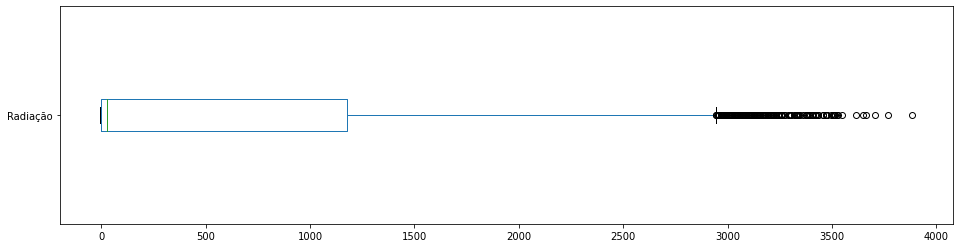

In [ ]:
#Representação dos outliers
df.Radiação.plot(kind='box', vert=False, figsize=(16,4))

## Executar a limpeza dos outliers

In [ ]:
#Tratando outliers
q1_Radiação = df.Radiação.quantile(.25)
q3_Radiação = df.Radiação.quantile(.75)

IQR_Radiação = q3_Radiação - q1_Radiação
print('IQR da Feature Radiação:',IQR_Radiação)

#Definir Limites
sup_Radiação = q3_Radiação + 1.5 * IQR_Radiação
inf_Radiação = q1_Radiação - 1.5 * IQR_Radiação

print('Limite superior de Radiação:', sup_Radiação)
print('Limite inferior de Radiação:', inf_Radiação)

IQR da Feature Radiação: 1177.25
Limite superior de Radiação: 2943.125
Limite inferior de Radiação: -1765.875


In [ ]:
#Limpando

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Radiação > 2943.125].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.Radiação < 0.0].index, axis=0, inplace=True)

print('Dados antes da limpeza:', df.shape[0])
print('Dados apos limpeza:', df_clean.shape[0])

Dados antes da limpeza: 8360
Dados apos limpeza: 7589


In [ ]:
#Verificando valores sem outliers

df_clean.describe()

,Hora,Radiação
count,7589.000000,7589.000000
mean,11.899460,630.123129
std,6.928206,874.397059
min,0.000000,0.000000
25%,6.000000,0.111000
50%,12.000000,48.270000
75%,18.000000,1189.000000
max,23.000000,2943.000000


* é possivél notar uma diminuição no desvio padrão dos dados e também a exclusão de numeros inferiores a 0

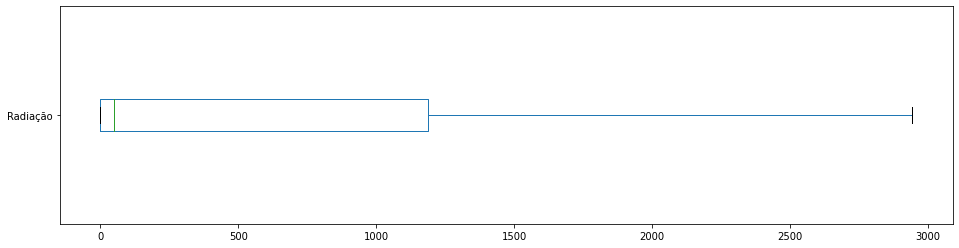

In [ ]:
#Plotando dados limpos
df_clean.Radiação.plot(kind='box', vert=False, figsize=(16,4))

### Agrupamento e ordenação
Os dados serão agrupados pela coluna Data Correta e ordenado pela mesma.
Já a coluna radiação será transformada na média

In [ ]:
dfg = df_clean.groupby(['Data'])["Radiação"].mean().reset_index()
dfg

,Data,Radiação
0,2019-06-03,664.567250
1,2019-06-04,601.368375
2,2019-06-05,686.341542
3,2019-06-06,731.963167
4,2019-06-07,525.003167
...,...,...
346,2020-05-27,1126.237500
347,2020-05-28,1108.170462
348,2020-05-29,895.174500
349,2020-05-30,724.106071


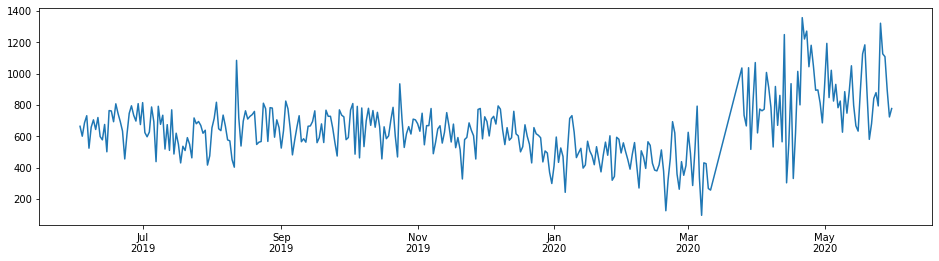

In [ ]:
fig,ax = plt.subplots(figsize=(16,4))

ax.plot(dfg.Data, dfg.Radiação)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.show()

In [ ]:
dfh = df_clean.groupby(['Hora'])['Radiação'].mean().reset_index()
dfh

,Hora,Radiação
0,0,4.862109
1,1,3.331933
2,2,2.211180
3,3,1.537354
4,4,1.549887
5,5,0.836947
6,6,0.775127
7,7,0.853324
8,8,0.540569
9,9,0.460908


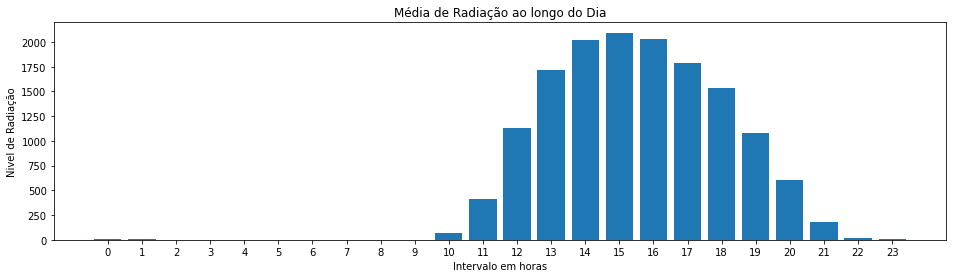

In [ ]:
objects = dfh['Hora']
y_pos = np.arange(len(objects))
performance = dfh['Radiação']

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.gcf().set_size_inches(16,4)
plt.ylabel('Nivel de Radiação')
plt.xlabel('Intervalo em horas')
plt.title('Média de Radiação ao longo do Dia')

plt.show()

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn

sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
x= df.drop('Radiação', axis = 1).columns
x


Index(['Data', 'Hora'], dtype='object')

### Conclusão:

Pode-se observar uma queda na radiação de 2019 para 2020 que pode ter sido ocasionada pela covid-19.

Podemos identificar também que o período do dia com maior radiação é entre 13 horas e 18 horas, representando 70% da radiação de um dia inteiro.